### Lab: Building a Gradient Descent Optimizer from Scratch

In this lab, we explore gradient descent optimization by building on provided code for a simple gradient descent optimizer. This foundational code helps us understand basic gradient descent mechanics and serves as a starting point for implementing more advanced concepts. The lab covers:

1. **Provided Code**: We begin with a simple gradient descent optimizer, along with code to calculate gradients and visualize loss over iterations. This foundational code helps us understand the gradient descent process and serves as a reference for further implementation.
2. **Adding Regularization**: Using the simple optimizer, we incorporate regularization terms into the loss function to reduce overfitting and improve model generalization.
3. **Implementing Stochastic Gradient Descent (SGD)**: We adapt the optimizer to a stochastic version, allowing for mini-batch updates, which are crucial for handling large datasets and enhancing convergence speed.
4. **Testing the Gradient Calculations**: With both regularization and stochastic descent, we test the accuracy of our gradient calculations. This step is crucial for ensuring the optimizer converges to the correct solution.
5**Performance Comparison**: Finally, we visualize and analyze the effects of different optimization approaches—standard gradient descent, stochastic gradient descent, and adaptive step size—by plotting loss over iterations and understanding their impact on convergence.

This lab provides hands-on experience with implementing regularization, stochastic gradient descent, and adaptive learning rates, building on a basic gradient descent foundation to explore key optimization techniques in machine learning.

#### Provided Code
**Up until Regulation section - noted with a markdown header**

In [6]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [7]:
# Load and preprocess Breast Cancer data
names = ['id','thick','size_unif','shape_unif','marg','cell_size','bare',
         'chrom','normal','mit','class']
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/' +
                 'breast-cancer-wisconsin/breast-cancer-wisconsin.data',
                names=names,na_values='?',header=None)
df = df.dropna()
df.head()

,id,thick,size_unif,shape_unif,marg,cell_size,bare,chrom,normal,mit,class
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2


In [8]:
# Get the predictors
xnames = ['thick','size_unif','shape_unif','marg','cell_size','bare',
         'chrom','normal','mit']
Xraw = np.array(df[xnames])
# As usual, let's also append an all ones vector onto X to serve as the intercept feature
X = np.concatenate((np.ones((Xraw.shape[0],1)),Xraw),axis=1)

# Get the response.  Convert to a zero-one indicator
yraw = np.array(df['class'])
BEN_VAL = 2   # value in the 'class' label for benign samples
MAL_VAL = 4   # value in the 'class' label for malignant samples
y = (yraw == MAL_VAL).astype(int) # now y has values of 0,1
Iben = (y==0)
Imal = (y==1)

In [9]:
# Function to calculate loss and gradient
# Returns the loss and gradient given beta, X, and y
def Leval(beta,X,y):
    """
    Compute the loss and gradient given beta,X,y
    """
    z = X@beta
    h = 1/(1+np.exp(-z))
    
    # loss
    L = np.sum((1-y)*z - np.log(h))

    # Gradient
    Lgrad = (X.T)@(h-y)
    return L, Lgrad

In [10]:
# Test the function with random beta

# Some random point
p = X.shape[1]
beta0 = np.random.randn(p)

# Call the function
L, Lgrad = Leval(beta0,X,y)
print(L)

1213.8634775628368


In [11]:
# Create a function with X,y fixed
Leval_param = lambda beta: Leval(beta,X,y)

# You can now pass a parameter like w0
L0, Lgrad0 = Leval_param(beta0)
print(L0)

1213.8634775628368


In [12]:
# Testing the gradient

# Take a random initial point
p = X.shape[1]
beta0 = np.random.randn(p)

# Perturb the point
step = 1e-6
beta1 = beta0 + step*np.random.randn(p)

# Measure the function and gradient at w0 and w1
L0, Lgrad0 = Leval_param(beta0)
L1, Lgrad1 = Leval_param(beta1)

# Predict the amount the function should have changed based on the gradient
dL_est = Lgrad0.T@(beta1-beta0)

# Print the two values to see if they are close
print("Actual L1-L0    = %12.4e" % (L1-L0))
print("Predicted L1-L0 = %12.4e" % dL_est)

Actual L1-L0    =   3.3148e-04
Predicted L1-L0 =   3.3148e-04


In [13]:
# Function for a simple gradient descent optimizer
# Returns the optimized beta, final loss, and history of loss over iterations
def grad_opt_simp(grad_func, beta0, lr=1e-3,nit=1000):
    """
    Simple gradient descent optimization

    grad_func:  A function that returns the objective function L, and its gradient Leval
    beta0:  Initial estimate for parameters beta
    lr:     learning rate
    nit:    Number of iterations
    """

    # Create history dictionary for tracking progress per iteration.
    # This isn't necessary if you just want the final answer, but it
    # is useful for visualizing convergence and debugging
    hist = {'beta': [], 'L': []}

    # initialize
    beta = beta0

    # Loop over iterations
    for it in range(nit):

        # Evaluate the function and gradient
        L, Lgrad = grad_func(beta)

        # Take a gradient step
        beta = beta - lr*Lgrad

         # Save history
        hist['L'].append(L)
        hist['beta'].append(beta)

    # Convert to numpy arrays
    hist['L'] = np.array(hist['L'])
    hist['beta'] = np.array(hist['beta'])

    return beta, L, hist

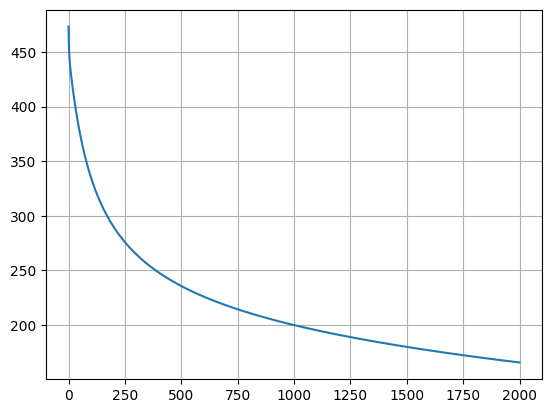

In [14]:
# Run the optimizer and plot loss over iterations
# Initial condition
beta0 = np.zeros(p)

# Parameters
nit = 2000
lr = 1e-5

# Run the gradient descent
beta, L, hist = grad_opt_simp(Leval_param, beta0, lr=lr, nit=nit)

# Plot the training loss
t = np.arange(nit)
plt.plot(t, hist['L'])
plt.grid()

In [15]:
# Function to predict class labels
# Returns the predicted class labels given X and beta
def predict(X,beta):
    z = X@beta
    yhat = (z > 0)
    return (1*yhat)

In [16]:
# Predict and calculate accuracy
yhat = predict(X,beta)
acc = np.mean(yhat == y)
print("Train accuracy = %f" % acc)

Train accuracy = 0.941435


lr=    1.00e-05  Train accuracy = 0.941435
lr=    1.00e-04  Train accuracy = 0.969253
lr=    1.00e-03  Train accuracy = 0.970717
lr=    1.00e-02  Train accuracy = 0.961933


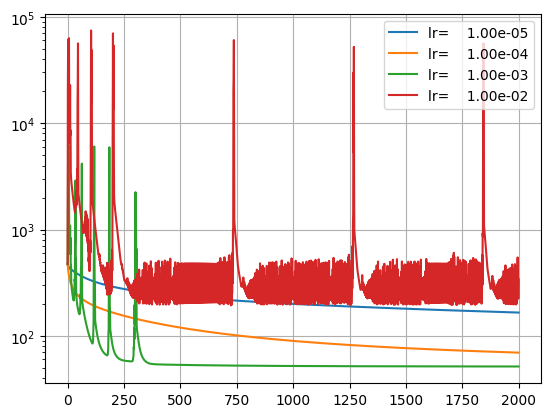

In [17]:
# Testing and plotting convergence of various learning rates to find the one that converges the fastest and observing when it becomes unstable

# Learning rate values to test
lr_test = [1e-5,1e-4,1e-3, 1e-2]
ntest = len(lr_test)

# Strings for the legend
leg_str = []

beta0 = np.zeros(p)
for i in range(ntest):
    # Run the optimizer
    beta, L, hist = grad_opt_simp(Leval_param, beta0, lr=lr_test[i], nit=nit)

    # Plot the results
    plt.semilogy(t, hist['L'])
    leg_str.append("lr=%12.2e" % lr_test[i])

    # Measure the train accuracy
    yhat = predict(X,beta)
    acc = np.mean(yhat == y)
    print("lr=%12.2e  Train accuracy = %f" % (lr_test[i], acc))

plt.grid()
plt.legend(leg_str, loc='upper right')

In [18]:
# Function to run gradient descent with adaptive step size using the Armijo method
# Returns the optimized beta, final loss, and history of loss over iterations (for visualization)
def grad_opt_adapt(grad_func, beta0, nit=2000, lr_init=1e-3):
    """
    Gradient descent optimization with adaptive step size

    feval:  A function that returns f, fgrad, the objective
            function and its gradient
    beta0:  Initial estimate
    nit:    Number of iterations
    lr:     Initial learning rate
    """

    # Set initial point
    beta = beta0
    lr = lr_init

    # Create history dictionary for tracking progress per iteration.
    # This isn't necessary if you just want the final answer, but it
    # is useful for debugging
    hist = {'lr': [], 'beta': [], 'L': []}

    L,Lgrad = grad_func(beta0)
    for it in range(nit):

        # Take a gradient step
        beta1 = beta - lr*Lgrad

        # Evaluate the test point by computing the objective function, L1,
        # at the test point and the predicted decrease, df_est
        L1, Lgrad1 = grad_func(beta1)
        df_est = Lgrad.T@(beta1-beta)

        # Check if test point passes the Armijo condition
        alpha = 0.5
        if (L1-L < alpha*df_est) and (L1 < L):
            # If descent is sufficient, accept the point and increase the learning rate
            lr = lr*2
            L = L1
            Lgrad = Lgrad1
            beta = beta1
        else:
            # Otherwise, decrease the learning rate
            lr = lr/2

        # Save history
        hist['L'].append(L)
        hist['lr'].append(lr)
        hist['beta'].append(beta)

    # Convert to numpy arrays
    for elem in ('L', 'lr', 'beta'):
        hist[elem] = np.array(hist[elem])
    return beta, L, hist

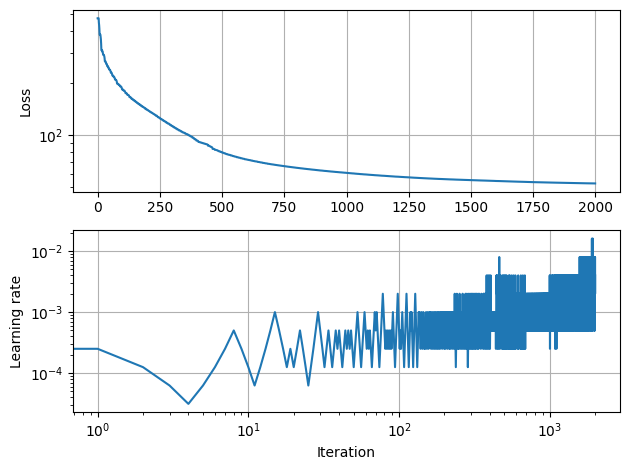

In [19]:
# Run the optimizer and plot loss and learning rate over iterations
beta0 = np.zeros(p)
nit = 2000
beta, L, hist = grad_opt_adapt(Leval_param, beta0, nit=nit)

t = np.arange(nit)
plt.subplot(2,1,1)
plt.semilogy(t, hist['L'])
plt.grid()
plt.ylabel('Loss')

plt.subplot(2,1,2)
plt.loglog(t, hist['lr'])
plt.grid()
plt.ylabel('Learning rate')
plt.xlabel('Iteration')
plt.tight_layout()

In [20]:
# Predict and calculate accuracy
yhat = predict(X,beta)
acc = np.mean(yhat == y)
print("Train accuracy = %f" % acc)

Train accuracy = 0.970717


#### Adding L2 Regularization
**Note: The bode below this point is mine and was not provided**

In [21]:
# Function to calculate loss and gradient with L2 regularization
# Returns the regularized loss and gradient given beta, X, y, and regularization parameter lamb
def Leval_reg(beta,X,y,lamb):

    z = X@beta
    h = 1/(1+np.exp(-z))
    Lr = np.sum((1-y)*z - np.log(h)) + lamb*np.sum(beta**2)
    Lrgrad = (X.T)@(h-y) + 2*lamb*beta

    return Lr, Lrgrad

In [22]:
# Code to test the gradient calculation accuracy for the regularized loss
# Prints the actual and predicted loss difference for different regularization parameters

# new func w fixed X and y
Leval_reg_param = lambda beta, lamb: Leval_reg(beta, X, y, lamb)

p = X.shape[1]
beta0 = np.random.randn(p)

step = 1e-6
beta1 = beta0 + step*np.random.randn(p)

lambs = [0,1,10,100]

for i in lambs:
    L0, Lgrad0 = Leval_reg_param(beta0, i)
    L1, Lgrad1 = Leval_reg_param(beta1, i)
    
    dL_est = Lgrad0.T@(beta1-beta0)
    print("Actual L1-L0 at lamb = %f   = %12.4e" % (i, L1-L0))
    print("Predicted L1-L0 at lamb = %f = %12.4e" % (i, dL_est))

Actual L1-L0 at lamb = 0.000000   =   8.6959e-03
Predicted L1-L0 at lamb = 0.000000 =   8.6959e-03
Actual L1-L0 at lamb = 1.000000   =   8.7068e-03
Predicted L1-L0 at lamb = 1.000000 =   8.7068e-03
Actual L1-L0 at lamb = 10.000000   =   8.8050e-03
Predicted L1-L0 at lamb = 10.000000 =   8.8050e-03
Actual L1-L0 at lamb = 100.000000   =   9.7865e-03
Predicted L1-L0 at lamb = 100.000000 =   9.7865e-03


In [23]:
# Updated function to apply adaptive step size gradient descent with L2 regularization (passing additional regularization parameter)
# Returns the optimized beta, final loss, and history of loss over iterations (for visualization)
def grad_opt_adapt_reg(grad_func, beta0, lamb, nit=2000, lr_init=1e-3):

    # Set initial point
    beta = beta0
    lr = lr_init

    # Create history dictionary for tracking progress per iteration.
    # This isn't necessary if you just want the final answer, but it
    # is useful for debugging
    hist = {'lr': [], 'beta': [], 'L': []}

    L,Lgrad = grad_func(beta0, lamb)
    for it in range(nit):

        # Take a gradient step
        beta1 = beta - lr*Lgrad

        # Evaluate the test point by computing the objective function, L1,
        # at the test point and the predicted decrease, df_est
        L1, Lgrad1 = grad_func(beta1, lamb)
        df_est = Lgrad.T@(beta1-beta)

        # Check if test point passes the Armijo condition
        alpha = 0.5
        if (L1-L < alpha*df_est) and (L1 < L):
            # If descent is sufficient, accept the point and increase the learning rate
            lr = lr*2
            L = L1
            Lgrad = Lgrad1
            beta = beta1
        else:
            # Otherwise, decrease the learning rate
            lr = lr/2

        # Save history
        hist['L'].append(L)
        hist['lr'].append(lr)
        hist['beta'].append(beta)

    # Convert to numpy arrays
    for elem in ('L', 'lr', 'beta'):
        hist[elem] = np.array(hist[elem])
    return beta, L, hist

In [24]:
# Testing the training loss with L2 regularization and adaptive step size (we see the training loss decrease, as is expected with regularization, with the idea that the model generalizes better)
beta0 = np.zeros(p)
nit = 2000

for i in lambs:
    beta, L, hist = grad_opt_adapt_reg(Leval_reg_param, beta0, i, nit=nit)
    yhat = predict(X, beta)
    acc = np.mean(yhat == y)
    print("Train accuracy at Lambda = %d: %f" % (i, acc))

Train accuracy at Lambda = 0: 0.970717
Train accuracy at Lambda = 1: 0.969253
Train accuracy at Lambda = 10: 0.959004
Train accuracy at Lambda = 100: 0.920937


#### Implementing Stochastic Gradient Descent (SGD)

In [25]:
# Function to calculate gradient for stochastic gradient descent 
# Not calculating loss to maintain efficiency
def Leval_stoc(beta0,x,y):

    beta = beta0
    z = x @ beta
    h = 1/(1+np.exp(-z))
    Lgrad_stoc = x.T * (h-y)
    
    return Lgrad_stoc

Testing the gradient calculation accuracy for stochastic gradient descent by verifying that $n\cdot \mathbb{E}[\nabla L_j(\vec{\beta})] = \nabla L(\vec{\beta})$

In [26]:
# Initialize beta
beta = np.random.randn(X.shape[1])

num_samples = 10000
Egrad = np.zeros(beta.shape)
np.random.seed(42) 

# Compute the full gradient
L, Lgrad = Leval(beta, X, y)

# Estimate the expected stochastic gradient using 10000 random samples
for i in range(num_samples):
    ind = np.random.randint(0, X.shape[0]-1)
    x_j = X[ind]
    y_j = y[ind]
    Egrad += Leval_stoc(beta, x_j, y_j)
Egrad *= (X.shape[0]/num_samples)

# Print the results
print("Estimated gradient (stochastic):", Egrad)
print("Full gradient:", Lgrad)

Estimated gradient (stochastic): [ 443.08184905 1301.08851376  579.17104615  628.21489991  597.91653591
  937.78117491  602.32441503  928.96429926  555.58542395  467.43144481]
Full gradient: [ 443.002936   1314.88830189  578.96497942  626.91490476  596.72412303
  934.31104512  596.97671324  923.24013559  558.8828382   471.96266343]


In [27]:
# Function to run SGD optimizer
# Returns the optimized beta, final loss, and history of loss over iterations (for visualization)
def stoc_grad_opt(X,y, stoc_grad_func, beta0, lr=1e-2,nit=1000):

    # Create history dictionary for tracking progress per iteration.
    hist = {'beta': [], 'L': []}

    # initialize
    beta = np.array(beta0)

    # Loop over iterations
    for it in range(nit):
        ind = np.random.randint(0, X.shape[0]-1)
        x_j = X[ind]
        y_j = y[ind]
        # Evaluate the function and gradient
        Lgrad = stoc_grad_func(beta, x_j, y_j)

        # Take a gradient step
        beta = beta - lr*X.shape[0]*Lgrad
        
        #find loss
        z = (np.array(X@beta)).flatten()
        h = 1/(1+np.exp(-z))
        
        # loss
        L = np.sum((1-y)*z - np.log(h))

         # Save history
        hist['L'].append(L)
        hist['beta'].append(beta)

    # Convert to numpy arrays
    hist['L'] = np.array(hist['L'])
    hist['beta'] = np.array(hist['beta'])

    return beta, L, hist

**THE FOLLOWING CODE BLOCK IS NOT MINE**

It was provided to test the SGD optimizer and plot the loss over iterations

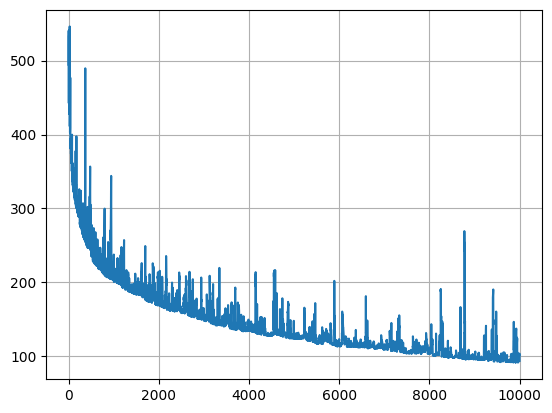

In [28]:
# Initial condition
beta0 = np.zeros(p)

# Parameters
nit = 10000
lr = 1e-5

# Run the gradient descent
beta, L, hist = stoc_grad_opt(X, y, Leval_stoc, beta0, lr=lr, nit=nit)

# Plot the training loss
t = np.arange(nit)
plt.plot(t, hist['L'])
plt.grid()

### Implementing SGD with Epochs instead of Iterations
**THE REMAINING CODE BLOCKS ARE MINE**


In [29]:
# Function to run SGD optimizer with epochs
# Returns the optimized beta, final loss, and history of loss over iterations (for visualization)

def stoc_grad_opt_epoch(X,y, stoc_grad_func, beta0, lr=1e-3,nepoch=500):
    """
    Simple stochastic gradient descent optimization

    stoc_grad_func:  A function that returns the stochastic gradient of the lost for a given input rows of X and entry of y
    beta0:  Initial estimate for parameters beta
    lr:     learning rate
    nepoch:    Number of epochs of training
    """

    # Create history dictionary for tracking progress per iteration.
    hist = {'beta': [], 'L': []}

    # TODO: fill in this code
    beta = np.array(beta0)

    # Loop over iterations
    for it in range(nepoch):
        shuffledInd = np.random.permutation(X.shape[0])
        X_shuffled = X[shuffledInd]
        y_shuffled = y[shuffledInd]
        
        for i in range(X_shuffled.shape[0]):
            # Evaluate the function and gradient
            Lgrad = stoc_grad_func(beta, X_shuffled[i], y_shuffled[i])
    
            # Take a gradient step
            beta = beta - lr*X_shuffled.shape[0]*Lgrad
            
            #find loss
            z = (np.array(X@beta)).flatten()
            h = 1/(1+np.exp(-z))
            
        # loss
        L = np.sum((1-y)*z - np.log(h))

         # Save history
        hist['L'].append(L)
        hist['beta'].append(beta)

    # Convert to numpy arrays
    hist['L'] = np.array(hist['L'])
    hist['beta'] = np.array(hist['beta'])
    return beta, L, hist

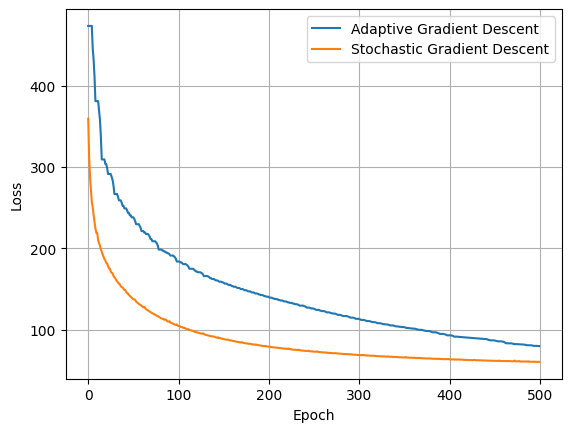

In [30]:
# Plotting the loss over 500 epochs for the SGD optimizer and the adaptive step size optimizer for comparison

#redfine grad_opt_adapt for epochs not iterations
beta0 = np.zeros(p)
nepoch = 500

betaAdapt, Ladapt, histAdapt = grad_opt_adapt(Leval_param, beta0, nit=nepoch)
betaStoc, Lstoc, histStoc = stoc_grad_opt_epoch(X, y, Leval_stoc, beta0, lr=1e-6, nepoch=nepoch)

t = np.arange(nepoch)

plt.figure()
plt.plot(t, histAdapt['L'], label='Adaptive Gradient Descent')
plt.plot(t, histStoc['L'], label='Stochastic Gradient Descent')
plt.grid()
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()